#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#Importing dataset

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Checking for null values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Dropping the Cabin column as it's almost fully null

In [ ]:
df.drop(columns = 'Cabin', inplace =True)

In [ ]:
df.shape

(891, 11)

#Handling Missing values

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#Performing EDA

##Finding and plotting correlation

<ipython-input-70-49402959770a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)


<Axes: >

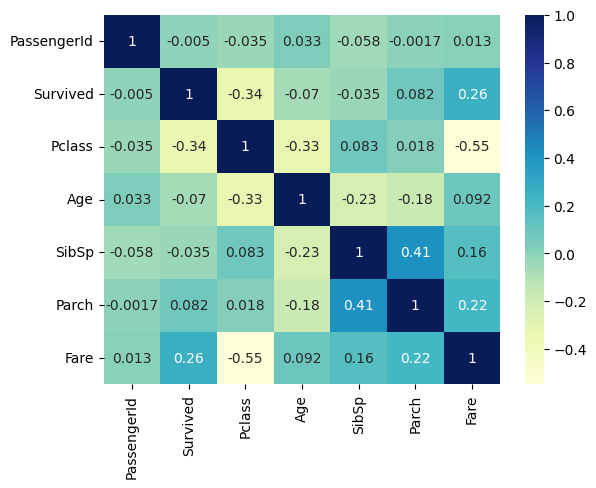

In [ ]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

##Checking no. of persons survived and not survived

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

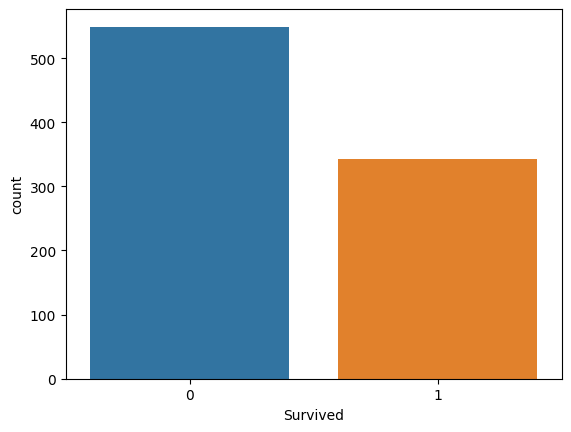

In [ ]:
sns.countplot(x = df['Survived'])

##Gender wise survivors

<Axes: xlabel='Sex', ylabel='count'>

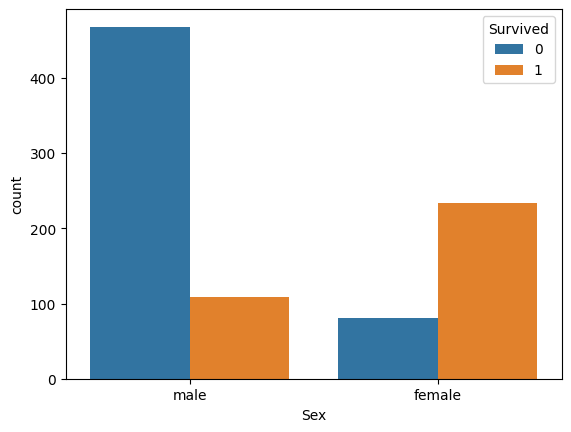

In [ ]:
sns.countplot(x = df['Sex'], hue = df['Survived'])

##Ticket Class wise survivors

<Axes: xlabel='Pclass', ylabel='count'>

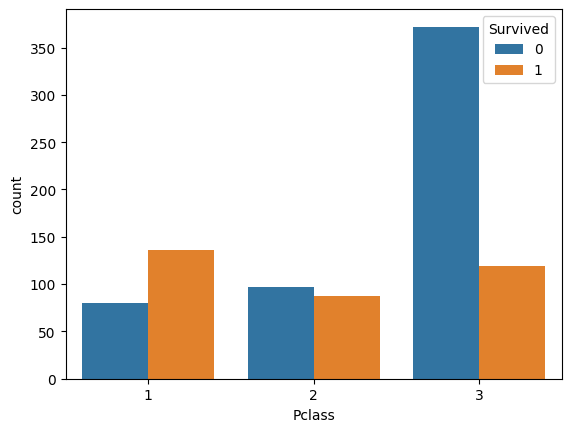

In [ ]:
sns.countplot(x = df['Pclass'], hue = df['Survived'])

##Embarked Survivors

<Axes: xlabel='Embarked', ylabel='count'>

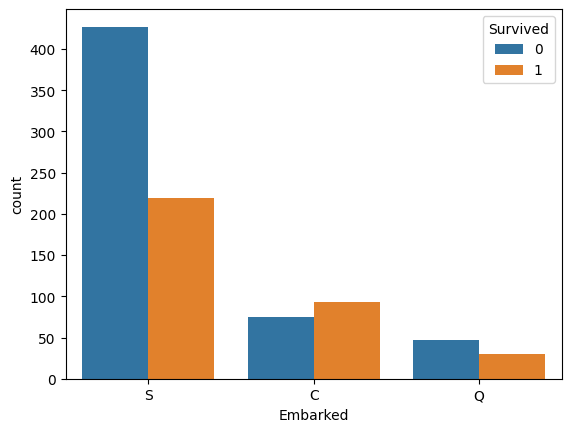

In [ ]:
sns.countplot(x = df['Embarked'], hue = df['Survived'])

#Encoding categorical variables

In [ ]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#Performing stratified shuffle split or unbiased split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)
for train_index, test_index in split.split(df, df[['Survived', 'Pclass', 'Sex']]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

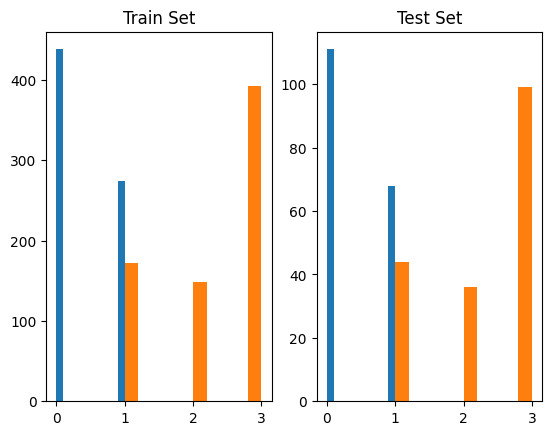

In [ ]:
plt.subplot(1,2,1)
plt.title('Train Set')
plt.hist(train_set['Survived'])
plt.hist(train_set['Pclass'])

plt.subplot(1,2,2)
plt.title('Test Set')
plt.hist(test_set['Survived'])
plt.hist(test_set['Pclass'])

plt.show()

In [ ]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",0,28.000000,0,0,347464,7.8542,0
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",1,47.000000,1,0,A/5. 3337,14.5000,0
348,349,1,3,"Coutts, Master. William Loch ""William""",0,3.000000,1,1,C.A. 37671,15.9000,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",1,25.000000,0,1,230433,26.0000,0
240,241,0,3,"Zabour, Miss. Thamine",1,29.699118,1,0,2665,14.4542,1


#Seperating Dependent Target variable from Independent features

In [ ]:
#independent useful features include Pclass, Sex, Age, SibSp, Fare, Embarked
X_train = train_set.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1).values
X_test = test_set.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1).values

#the Survived is the target variable
y_train = train_set['Survived'].values
y_test = test_set['Survived'].values

In [ ]:
X_train

array([[ 3.    ,  0.    , 28.    , ...,  0.    ,  7.8542,  0.    ],
       [ 3.    ,  1.    , 47.    , ...,  0.    , 14.5   ,  0.    ],
       [ 3.    ,  0.    ,  3.    , ...,  1.    , 15.9   ,  0.    ],
       ...,
       [ 3.    ,  1.    , 25.    , ...,  0.    ,  7.925 ,  0.    ],
       [ 3.    ,  0.    , 39.    , ...,  0.    ,  7.925 ,  0.    ],
       [ 2.    ,  0.    , 44.    , ...,  0.    , 26.    ,  0.    ]])

In [ ]:
y_train

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,

#Training the model

##Logistic Regression

since the target variable is a binary categorical variable, Logistic Regression would be a good choice for it.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88 23]
 [17 51]]


0.776536312849162

In [ ]:
print(f"The accuracy of the Logistic Regression model is {accuracy_score(y_test, y_pred)*100} %")

The accuracy of the Logistic Regression model is 77.6536312849162 %


##SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[95 16]
 [21 47]]


0.7932960893854749

In [ ]:
print(f"The accuracy of the Support Vector Classifier model is {accuracy_score(y_test, y_pred)*100} %")

The accuracy of the Support Vector Classifier model is 79.3296089385475 %


##Kernel SVM

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[102   9]
 [ 52  16]]


0.659217877094972

In [ ]:
print(f"The accuracy of the Kernel Support Vector Classifier model is {accuracy_score(y_test, y_pred)*100} %")

The accuracy of the Kernel Support Vector Classifier model is 65.92178770949721 %


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[91 20]
 [22 46]]


0.7653631284916201

In [ ]:
print(f"The accuracy of the Naive Bayes model is {accuracy_score(y_test, y_pred)*100} %")

The accuracy of the Naive Bayes model is 76.53631284916202 %


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90 21]
 [23 45]]


0.7541899441340782

In [ ]:
print(f"The accuracy of the Decision Tree model is {accuracy_score(y_test, y_pred)*100} %")

The accuracy of the Decision Tree model is 75.41899441340783 %


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[92 19]
 [20 48]]


0.7821229050279329

In [ ]:
print(f"The accuracy of the Random Forest model is {accuracy_score(y_test, y_pred)*100} %")

The accuracy of the Random Forest model is 78.2122905027933 %


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88 23]
 [30 38]]


0.7039106145251397

In [ ]:
print(f"The accuracy of the KNN model is {accuracy_score(y_test, y_pred)*100} %")

The accuracy of the KNN model is 70.39106145251397 %


**SVM gave highest accuracy among all other classification models i.e. 79.3296089385475 %**